## Mitesh Kumar Chaudhary

### Supervised ML - Student Score Prediction - Linear Regression

### Import Libraries

In [137]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [138]:
st_score = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [139]:
st_score.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Data Understanding

#### a. Initial Analysis

In [140]:
print("No. of rowa : {}\nNo of columns : {}" .format(st_score.shape[0],st_score.shape[1]))

No. of rowa : 25
No of columns : 2


In [141]:
st_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [142]:
st_score.isna().sum()

Hours     0
Scores    0
dtype: int64

#### b. Assumption Check

##### (i) Linearity check - Passed

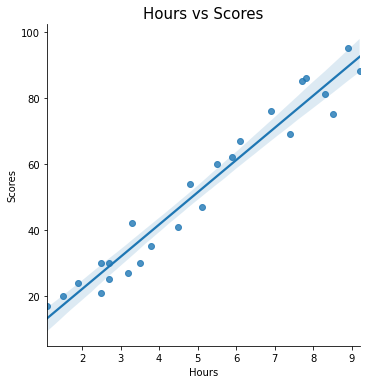

In [143]:
sns.lmplot(x="Hours",y="Scores",data=st_score)
plt.title('Hours vs Scores',size=15)
plt.show()

##### (ii) Normality Check

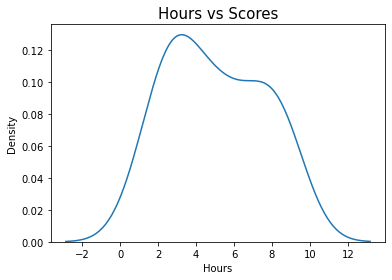

In [144]:
sns.distplot(a=st_score.Hours,hist=False)
plt.title('Hours vs Scores',size=15)
plt.show()

### Model Building

In [145]:
X = st_score[["Hours"]]
y = st_score[["Scores"]]

In [146]:
X.head(2)

,Hours
0,2.5
1,5.1


In [147]:
y.head(2)

,Scores
0,21
1,47


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [149]:
X_train.shape,X_test.shape

((20, 1), (5, 1))

### Model Training

In [150]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

### Model Testing

In [151]:
y_pred = linear_model.predict(X_test)

In [152]:
y_pred = pd.DataFrame(data=y_pred,columns=["Scores"])

In [153]:
y_pred

,Scores
0,9.970262
1,32.984700
2,18.339148
3,87.382463
4,48.676362


In [154]:
y_test.reset_index(inplace=True,drop=True)

In [155]:
y_test

,Scores
0,17
1,42
2,24
3,75
4,54


In [156]:
error = y_test-y_pred

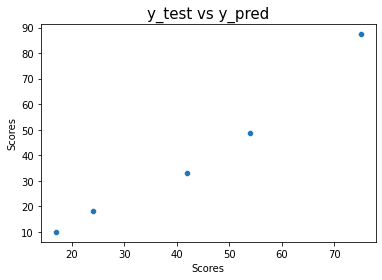

In [157]:
sns.scatterplot(x=y_test["Scores"],y=y_pred["Scores"])
plt.title('y_test vs y_pred',size=15)
plt.show()

### Model Evaluation

In [158]:
model = smf.ols("Scores~Hours",data=st_score).fit()

In [159]:
model.params

Intercept    2.483673
Hours        9.775803
dtype: float64

In [160]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Sat, 01 Jan 2022   Prob (F-statistic):           9.13e-17
Time:                        18:32:24   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [161]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error  : ",mean_squared_error(y_test,y_pred))

Mean Absolute Error :  7.882398086270432
Mean Squared Error  :  68.88092074277635


### Score if a student studies 9.25 hrs/day

##### Prepare Testing Data

In [162]:
d = {'Hours':[9.25]}
sample_data = pd.DataFrame(data=d)
sample_data

,Hours
0,9.25


##### Predict with Linear Model

In [163]:
result = linear_model.predict(X=sample_data)

In [164]:
pd.DataFrame(data=result,columns=["Scores"])

,Scores
0,95.228294


##### Predict with Coeffificiant and Intercept

In [170]:
coef = linear_model.coef_
inter = linear_model.intercept_

In [171]:
print("Coef : {}\nintercept : {}".format(coef,inter))

Coef : [[10.46110829]]
intercept : [-1.53695733]


In [177]:
result = (coef*9.25) + (inter)

In [178]:
pd.DataFrame(data=result,columns=["Scores"])

,Scores
0,95.228294
